# DATA SCIENCE INTERNSHIP

## -ESHAL MINHAJ

## TASK 2:
### DATA CLEANING AND EDA; Exploring Relationships, Patterns, & Trends in data.

Objective: To clean and explore the Titanic dataset, investigating relationships between variables, and uncovering patterns and trends to gain insights into factors influencing passenger survival on the Titanic.

In [33]:
#import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [34]:
#reading the dataset using the pandas lib
data=pd.read_csv(r'D:\datascience_projects\fun python projects\titanic\train.csv')
#observing the variables in the dataset
data.head() #displays the top 5 observations of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.tail() #displays the last 5 observations of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
data.shape #displays the no. of rows and columns in the dataset

(891, 12)

In [37]:
data.info() 
#data type and information about data, including the number of records in each column, 
#data having null or not null, Data type, the memory usage of the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


so through the info() we can see that our dataset the columns Age, Embarked and Cabin has null values.
The numeric variables has dtype as int64 anf float64 while the categorial variables have the dtype as objects.

In [38]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [39]:
data.isnull().sum() #used to get the number of missing records in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
(data.isnull().sum()/(len(data)))*100 #gives the percentage of missing values in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [43]:
#descriptive statistics of the object dtype
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [44]:
#descriptive statistics of number dtype
data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [45]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

as we can see around 38% of the passengers on the titanic survived while 61% couldn't make it

### Univariate analysis

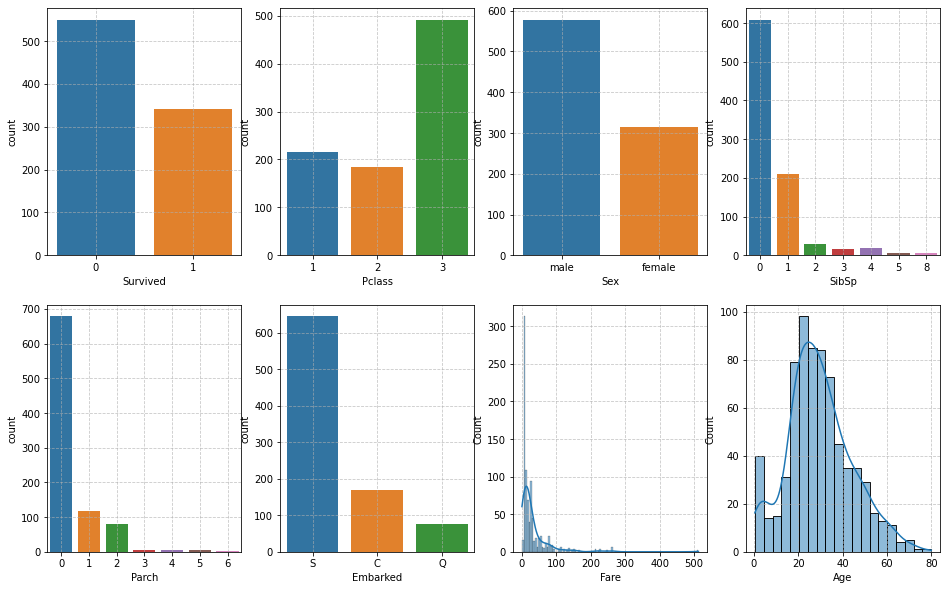

In [59]:
fig, axes= plt.subplots(2, 4, figsize=(16,10))
sns.countplot('Survived', data=data,ax=axes[0,0])
sns.countplot('Pclass', data=data, ax=axes[0,1])
sns.countplot('Sex',data=data, ax=axes[0,2])
sns.countplot('SibSp',data=data,ax=axes[0,3])
sns.countplot('Parch',data=data, ax=axes[1,0])
sns.countplot('Embarked',data=data, ax=axes[1,1])
sns.histplot(data['Fare'],kde=True, ax=axes[1,2])
sns.histplot(data['Age'].dropna(),kde=True, ax=axes[1,3])

for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.7)



#### Countplot:
The countplot is a categorical plot provided by the Seaborn library in Python. It is designed to show the counts of observations in each categorical bin using bars. This type of plot is particularly useful when you want to visualize the distribution of a categorical variable.

#### Axes variable :
The axes variable will be a 2D array of Axes objects, where each element in the array corresponds to one subplot.
When we create multiple subplots like this, we can then refer to each subplot using the axes array. For example, axes[0, 0] refers to the top-left subplot, and axes[1, 3] refers to the bottom-right subplot in the grid.

#### Histplot:
Histplot is a function in the Seaborn library used for creating histograms. It is designed to visualize the distribution of a univariate set of observations. In addition to the classic histogram, histplot can include a kernel density estimate (KDE) for a smooth representation of the underlying distribution.


In [60]:
survival_rates = data.groupby('Sex')['Survived'].mean() * 100
print(survival_rates)
#comforming the observation

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


#### Observations:
1. We can say that the male survival rate is around 20% while the female survival rate is around 75%, hence more females were able to survive the disaster and hence it can be said the survival rate has a close relation with the sex.
    
2. Pclass 1 has a better survival rate around 60% followed by pclass 2 with 47% survival chance and then pclass 3 with the   survival rate of only 24%, hence the worst survival rate.
    
3. Parch(passengers with parents or childern) =3 has a higher survival rate with 60% while parch=5 has a lower survival rate 
20% 
    
4. There exsist a marginal relationship between fare and survival as from the obsevation we can say higher the fare the  
chances of survival also increases. Also pclass=1 paid higher fare and that class has a higher chance of survival.
    
5. There is an interesting point to note that the fare has is dependent on the age but is indirectly dependent on the class 
for which the tickets are being purchased. So we can say that even if an individual with the age of 10 having pclass=3  
could be paying lesser fare as compared to the individual in the same age group having the pclass=1

In [63]:
survival_percentages_by_class = data.groupby('Pclass')['Survived'].mean() * 100
print(survival_percentages_by_class)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [66]:
survival_percentages_by_parch = data.groupby('Parch')['Survived'].mean() * 100
print(survival_percentages_by_parch)

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64


In [72]:
data['FamilySize'] = data['Parch'] + data['SibSp']

# Displaying the new 'FamilySize' column
print(data[['Parch', 'SibSp', 'FamilySize']])

     Parch  SibSp  FamilySize
0        0      1           1
1        0      1           1
2        0      0           0
3        0      1           1
4        0      0           0
..     ...    ...         ...
886      0      0           0
887      0      0           0
888      2      1           3
889      0      0           0
890      0      0           0

[891 rows x 3 columns]


In [73]:
survival_percentages_by_f = data.groupby('FamilySize')['Survived'].mean() * 100
print(survival_percentages_by_f)

FamilySize
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


In [87]:
survival_percentages_by_fare = data.groupby('Survived')['Fare'].mean() * 100
print(survival_percentages_by_fare)

Survived
0    2211.788689
1    4839.540760
Name: Fare, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

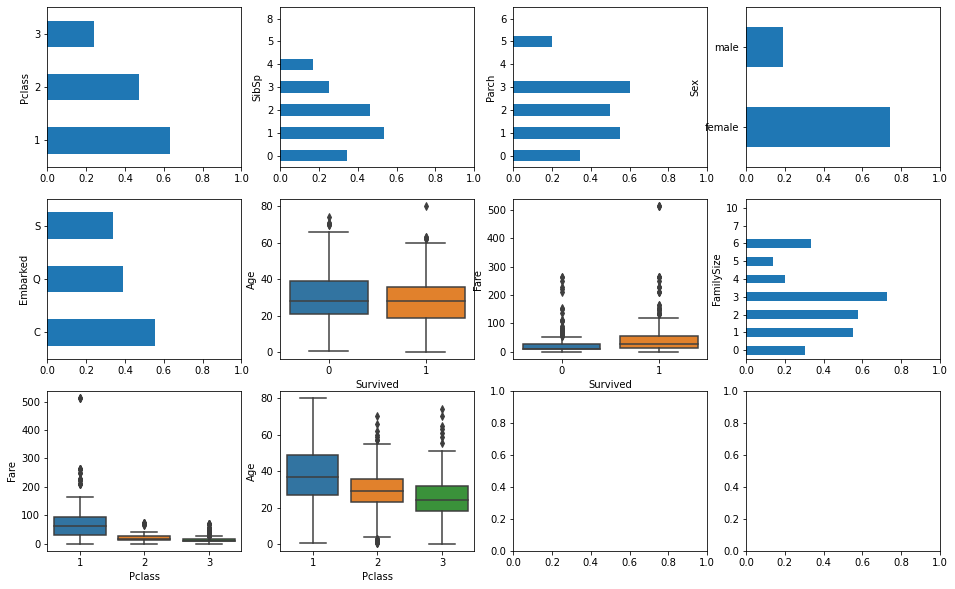

In [93]:
figbi, axesbi = plt.subplots(3, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
data.groupby('FamilySize')['Survived'].mean().plot(kind='barh',ax=axesbi[1,3],xlim=[0,1])
sns.boxplot(x="Pclass",y="Fare",data=data,ax=axesbi[2,0])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])
sns.boxplot(x="Pclass",y="Age",data=data,ax=axesbi[2,1])

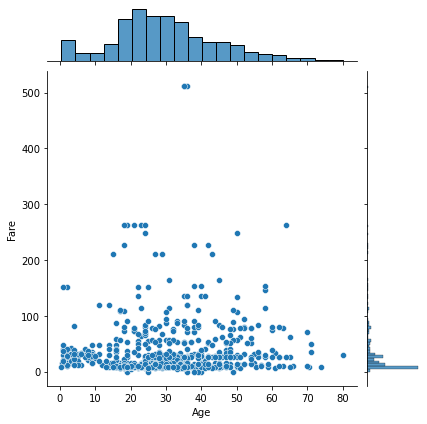

In [92]:
sns.jointplot(x="Age", y="Fare", data=data,ax=axesbi[2,1])

### MULTIVARIATE EDA

<AxesSubplot:>

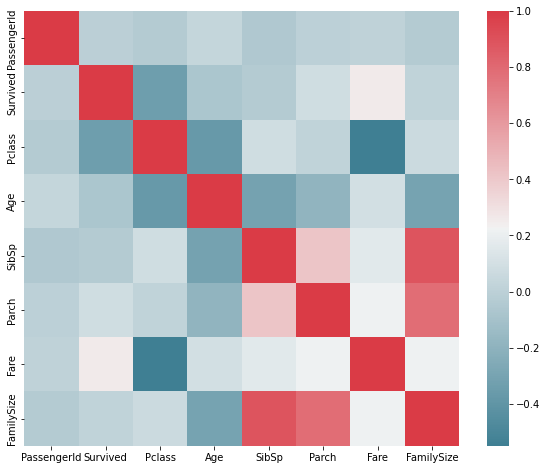

In [97]:
f, ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,
           mask=np.zeros_like(corr,dtype=bool),
           cmap=sns.diverging_palette(220,10,as_cmap=True),
           square=True,
           ax=ax)

##### Understanding a heatmap
In a correlation matrix heatmap, features with higher correlation values are represented by brighter or darker colors. Positive correlations are often represented by shades of one color (e.g., dark blue), and negative correlations by shades of another color (e.g., dark red).

##### Negetive Correlation:
Negative correlation signifies that as one variable increases, the other variable tends to decrease. In other words, there is an inverse relationship between the two variables. When one variable goes up, the other tends to go down, and vice versa.
For eg. when the pclass increases we can see the fare going down and vise versa.

##### Positive Correlation:
Positive correlation signifies that as one variable increases, the other variable tends to increase as well. In other words, there is a direct relationship between the two variables. When one variable goes up, the other tends to go up, and vice versa.

##### Observations:
1. There is a positive relation with fare and survived 
2. There is a negetive correlation with age & pclass, fare & pclass, pclass & survived